In [1]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk.data
#nltk.download('vader_lexicon')

In [2]:
df = pd.read_csv("cleaned_lyrics.csv");

In [29]:
# Create lists to store the different scores for each word

negative = []
neutral = []
positive = []
compound = []

# Initialize the model
sid = SentimentIntensityAnalyzer()

# Iterate for each row of lyrics and append the scores
new_string = ""
for item in df["Lyrics"]:
    new_string = item.replace("[", "")
    new_string = new_string.replace("'", "")
    new_string = new_string.replace(",", "")
    new_string = new_string.replace("]", "")
    #print(new_string)
    scores = sid.polarity_scores(new_string)
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])
# Create 4 columns to the main data frame  for each score
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df['compound'] = compound

# create an example array of values ranged from -1 to 1
values = df['compound']
# scale the values
scaled_array = (values + 1) / 2

sentiment = []
for value in values:
    if value >= 0:
        sentiment.append(1)
    else:
        sentiment.append(0)

df['compound_normalized'] = scaled_array
df['sentiment'] = sentiment
df.head(20)


,Unnamed: 0,Artist,Song,Lyrics,negative,neutral,positive,compound,compound_normalized,sentiment
0,0,Kidz Bop Kids,Ghostbusters,"['ghostbusters', 'theres', 'somethin', 'strang...",0.135,0.681,0.184,0.7960,0.89800,1
1,1,Creedence Clearwater Revival,Have You Ever Seen The Rain,"['ever', 'seen', 'rain', 'someone', 'told', 'l...",0.065,0.729,0.206,0.9413,0.97065,1
2,2,All Time Low,Blinding Lights,"['blinding', 'lights', 'ive', 'tryna', 'call',...",0.079,0.830,0.091,0.6300,0.81500,1
3,3,Bastille,Pompeii,"['phasa', 'thaiespaolportugusitalianopompeii',...",0.096,0.679,0.224,0.9813,0.99065,1
4,4,Bryan Adams,Summer Of '69,"['summer', 'got', 'first', 'real', 'sixstring'...",0.051,0.734,0.215,0.9805,0.99025,1
5,5,Bryan Adams,Merry Christmas,"['merry', 'christmas', 'special', 'time', 'yea...",0.063,0.486,0.452,0.9959,0.99795,1
6,6,The Cranberries,Zombie,"['zombie', 'another', 'head', 'hangs', 'lowly'...",0.147,0.853,0.000,-0.9349,0.03255,0
7,7,Kidz Bop Kids,Monster Mash,"['monster', 'mash', 'working', 'lab', 'late', ...",0.088,0.770,0.142,0.8750,0.93750,1
8,8,Autograf;Tiina,High On That New Love,"['high', 'new', 'love', 'high', 'new', 'love',...",0.082,0.728,0.190,0.9795,0.98975,1
9,9,OneRepublic,Rescue Me,"['rescue', 'would', 'rescue', 'would', 'get', ...",0.026,0.452,0.522,0.9996,0.99980,1


In [30]:
# insight - each word analyzed with no context 
df.to_csv("sentiment_lyrics.csv")

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
import csv
import random

# Set the file names
train_file = "train.csv"
test_file = "test.csv"

# Set the training data percentage
train_percent = 0.8

# Open the input file and the output files
with open("sentiment_lyrics.csv", "r") as input_csv_file, open(train_file, "w", newline='') as train_csv_file, open(test_file, "w", newline='') as test_csv_file:
    
    # Initialize the csv reader and writers
    csv_reader = csv.reader(input_csv_file)
    train_csv_writer = csv.writer(train_csv_file)
    test_csv_writer = csv.writer(test_csv_file)

    # Write the header row to both output files
    header_row = next(csv_reader)
    train_csv_writer.writerow(header_row)
    test_csv_writer.writerow(header_row)

    # Initialize the row counter
    row_count = 0
    
    # Iterate over the remaining rows in the input file
    for row in csv_reader:
        
        # Randomly assign the row to either the training or testing file
        if random.random() < train_percent:
            train_csv_writer.writerow(row)
        else:
            test_csv_writer.writerow(row)

        # Increment the row counter
        row_count += 1

print("Split {} rows into {} for training and {} for testing.".format(row_count, train_file, test_file))


Split 8734 rows into train.csv for training and test.csv for testing.


In [33]:
# take a sample of the data for calculations
testing_data = pd.read_csv("test.csv")
training_data = pd.read_csv("train.csv")

# create a bag of words for each item in Text
vectorizer = CountVectorizer()
bag_of_words_train = vectorizer.fit_transform(training_data['Lyrics'])
print(bag_of_words_train.toarray())

bag_of_words_test = vectorizer.transform(testing_data['Lyrics'])
print(bag_of_words_test.toarray())

# split data into training and testing sets
X_train = bag_of_words_train
X_test = bag_of_words_test

y_train = training_data["sentiment"]
y_test = testing_data["sentiment"]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [34]:
lc = LogisticRegression(max_iter=5000)
lc.fit(X_train, y_train)

y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_lc_predicted)
print("Accuracy of the Logisitic Regression: {:.1f}%".format(accuracy*100))
print(classification_report(y_test, y_lc_predicted))

Accuracy of the Logisitic Regression: 91.7%
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       809
           1       0.92      0.92      0.92       999

    accuracy                           0.92      1808
   macro avg       0.92      0.92      0.92      1808
weighted avg       0.92      0.92      0.92      1808



In [35]:
svc = SVC(probability=True) # SVM
svc.fit(X_train, y_train)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_svc_predicted)
print("Accuracy of the Standard Vector Machine Classifier is: {:.1f}%".format(accuracy*100))
print(classification_report(y_test, y_svc_predicted))

Accuracy of the Standard Vector Machine Classifier is: 87.6%
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       809
           1       0.89      0.88      0.89       999

    accuracy                           0.88      1808
   macro avg       0.87      0.87      0.87      1808
weighted avg       0.88      0.88      0.88      1808



In [36]:
nbc = GaussianNB() # naive bayes
nbc.fit(X_train.toarray(), y_train)

y_nbc_predicted = nbc.predict(X_test.toarray())
y_nbc_pred_proba = nbc.predict_proba(X_test.toarray())

accuracy = accuracy_score(y_true=y_test, y_pred=y_nbc_predicted)
print("Accuracy of the Naive Bayes Classifer is: {:.1f}%".format(accuracy*100))
print(classification_report(y_test, y_nbc_predicted))

Accuracy of the Naive Bayes Classifer is: 88.2%
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       809
           1       0.92      0.87      0.89       999

    accuracy                           0.88      1808
   macro avg       0.88      0.88      0.88      1808
weighted avg       0.88      0.88      0.88      1808



In [37]:
rfc = RandomForestClassifier() # random forest
rfc.fit(X_train, y_train)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_rfc_predicted)
print("Accuracy of the Random Forest Classifier is: {:.1f}%".format(accuracy*100))
print(classification_report(y_test, y_rfc_predicted))

Accuracy of the Random Forest Classifier is: 91.9%
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       809
           1       0.90      0.96      0.93       999

    accuracy                           0.92      1808
   macro avg       0.92      0.91      0.92      1808
weighted avg       0.92      0.92      0.92      1808



In [38]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_neigh_predicted = neigh.predict(X_test)
y_neigh_pred_proba = neigh.predict_proba(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_neigh_predicted)
print("Accuracy of the K Neighbors Classifier is: {:.1f}%".format(accuracy*100))
print(classification_report(y_test, y_neigh_predicted))

Accuracy of the K Neighbors Classifier is: 82.4%
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       809
           1       0.80      0.91      0.85       999

    accuracy                           0.82      1808
   macro avg       0.83      0.81      0.82      1808
weighted avg       0.83      0.82      0.82      1808



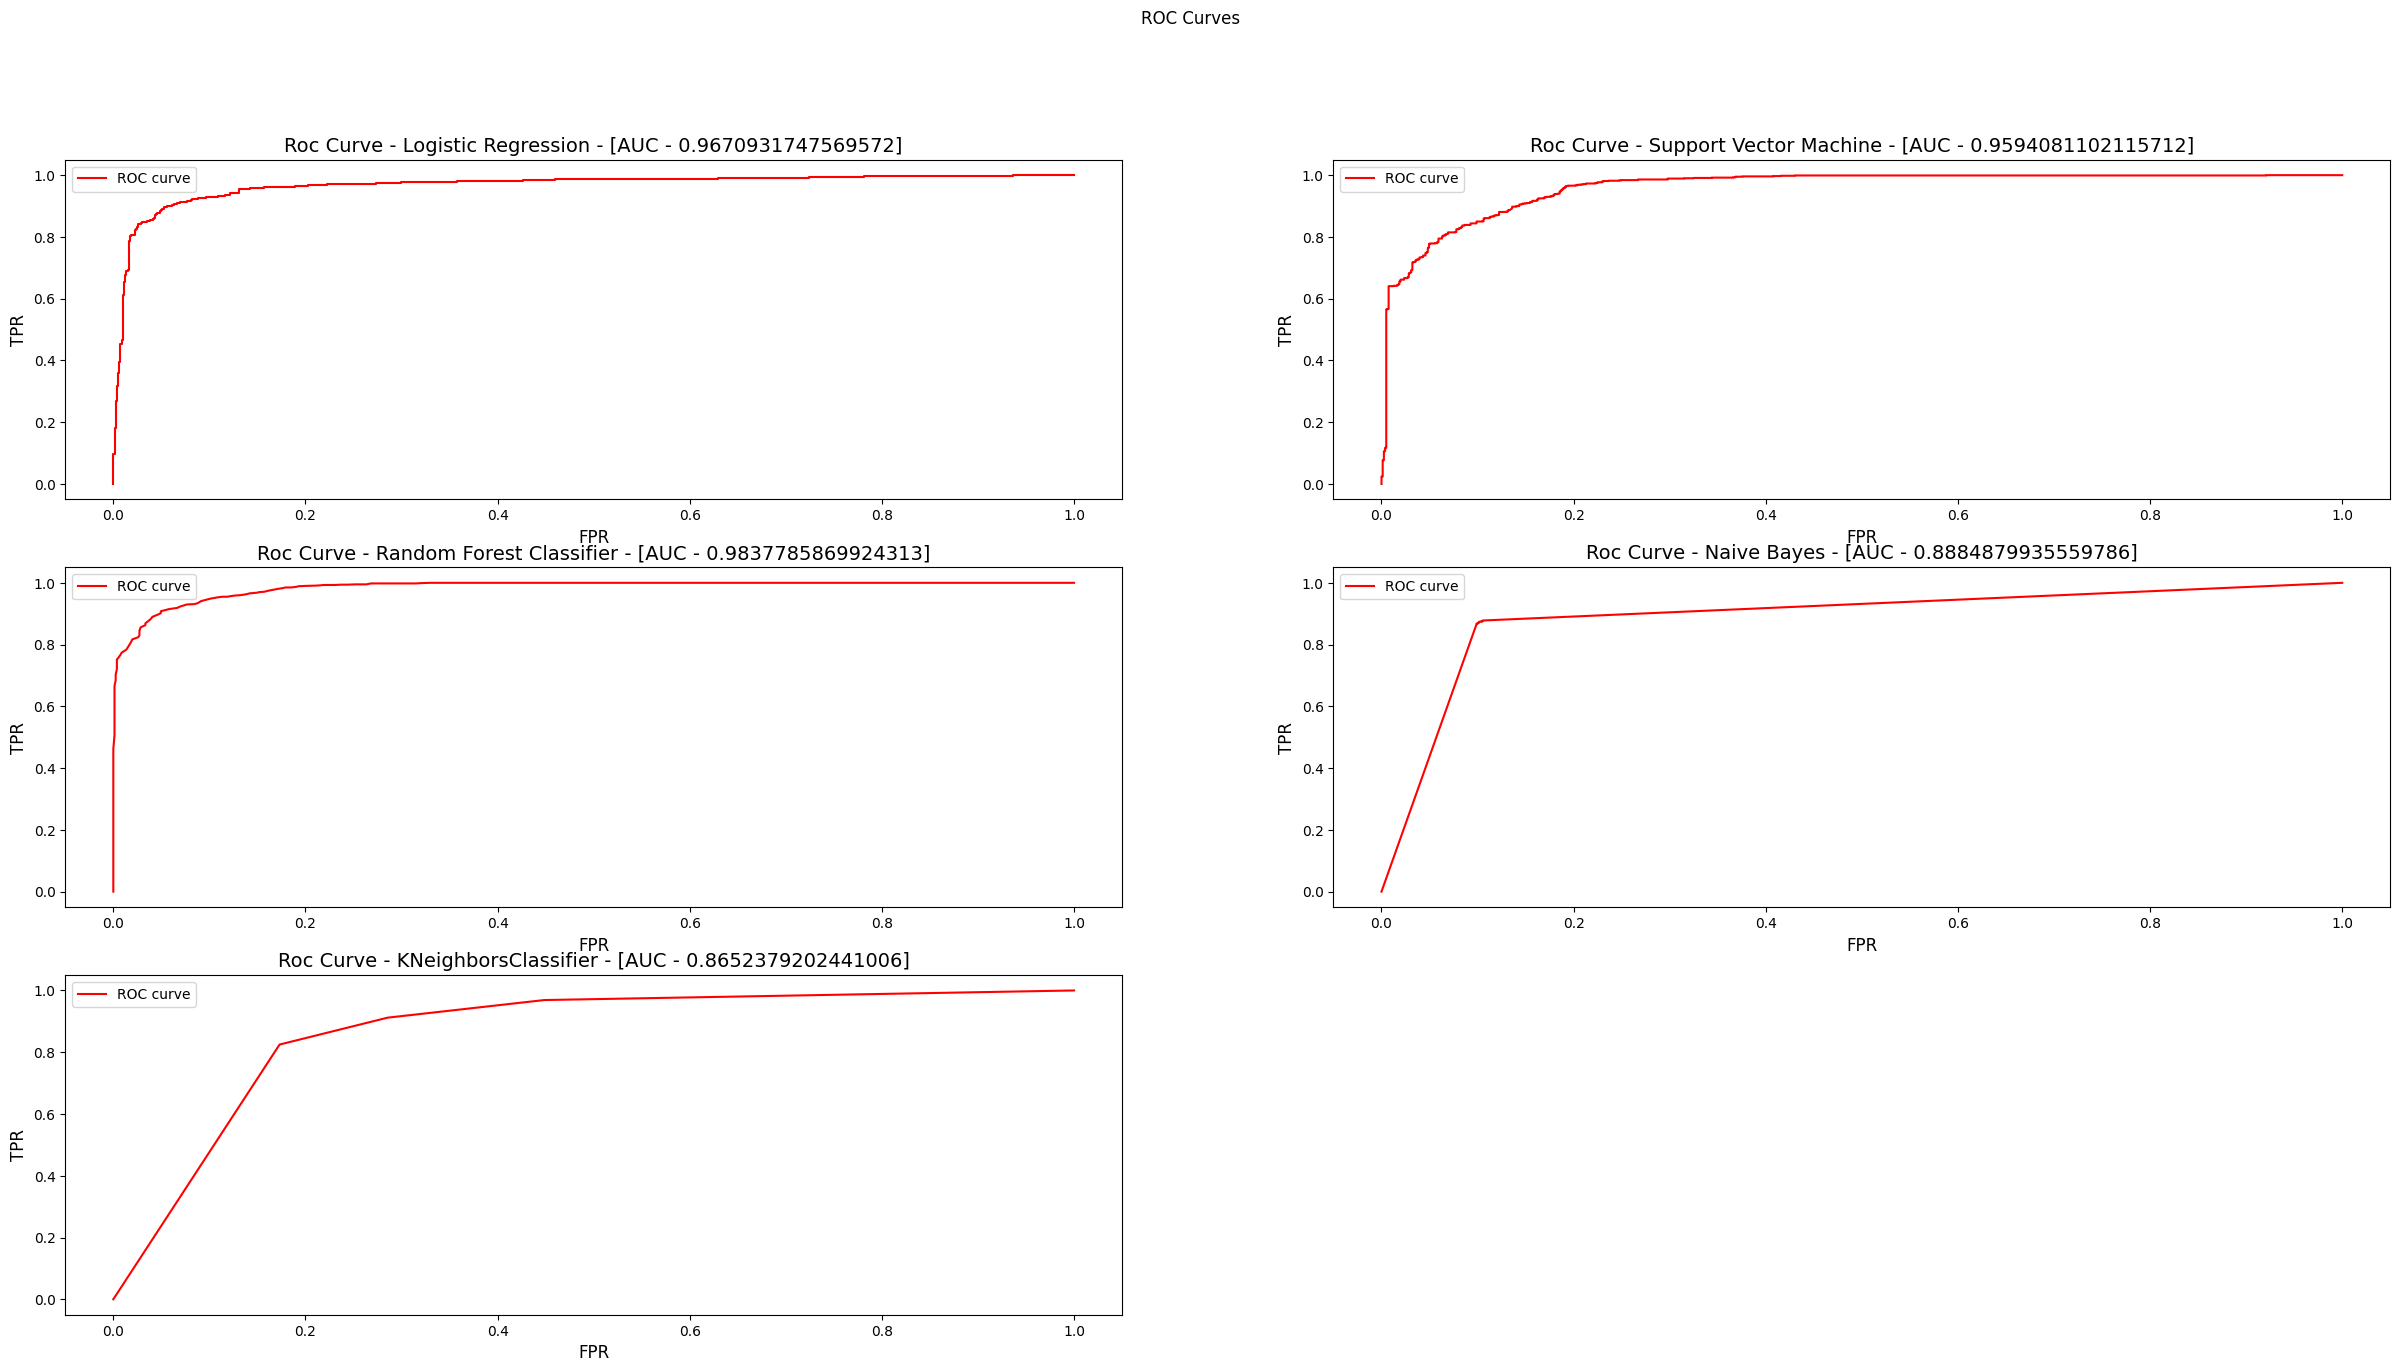

In [39]:
models = ['Logistic Regression', 'Support Vector Machine', 'Random Forest Classifier', 'Naive Bayes', 'KNeighborsClassifier']
predictions = [y_lc_predicted, y_svc_predicted, y_rfc_predicted, y_nbc_predicted, y_neigh_predicted]
pred_probabilities = [y_lc_pred_proba, y_svc_pred_proba, y_rfc_pred_proba, y_nbc_pred_proba, y_neigh_pred_proba]

plot = 1

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()